In [16]:
from moviepy.editor import VideoFileClip

video = VideoFileClip('themusic.mp4')
audio = video.audio
# audio = audio.set_channels(1)
audio.write_audiofile('themusicmono.wav',ffmpeg_params=["-ac", "1"])



MoviePy - Writing audio in themusicmono.wav


MoviePy - Done.


In [20]:
from pydub import AudioSegment

# Load your stereo audio file
audio = AudioSegment.from_file('themusic.wav')

# Split stereo audio into two mono files
left_channel, right_channel = audio.split_to_mono()

# Export each channel as a separate file
left_channel.export('left_channel.wav', format='wav')
right_channel.export('right_channel.wav', format='wav')


<_io.BufferedRandom name='right_channel.wav'>

/tmp/ipykernel_317/612797488.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')


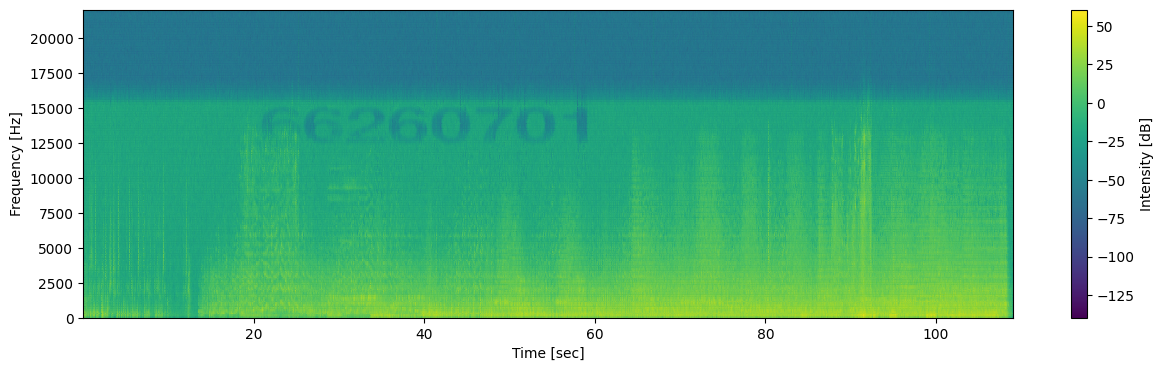

In [12]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import numpy as np

# Read the audio file
sample_rate, samples = wavfile.read('themusicmono.wav')

# Generate the spectrogram
frequencies, times, Sxx = spectrogram(samples, sample_rate)

# Plot the spectrogram
plt.figure(figsize=(15, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.show()


In [33]:
import wave
wav= wave.open("themusic.wav", mode='rb')
print (wav.getparams())

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=4809546, comptype='NONE', compname='not compressed')


In [34]:
frame_bytes = bytearray(list(wav.readframes(wav.getnframes())))
print(frame_bytes[:100])

bytearray(b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')


In [36]:
import struct
shorts = struct.unpack('H'*(len(frame_bytes)//2), frame_bytes)
    
extracted_left = shorts[::2] 
extracted_right = shorts[1::2]

# Get all LSB's
extractedLSB = ""
for i in range(0, len(shorts)):
    extractedLSB += str(shorts[i] & 1 )
    # extractedLSB += str(extracted_left[i] & 1) if i%2==0 else str(extracted_right[i] & 1)
# divide strings into blocks of eight binary strings
# convert them and join them back to string
string_blocks = (extractedLSB[i:i+8] for i in range(0, len(extractedLSB), 8))
decoded = ''.join(chr(int(char, 2)) for char in string_blocks)
# wav.close()
print(decoded[:500])

                                                                                                                                                                                                                                                                                                                                                                         0               0Ã  0  0 0Ã0 0     Ã0Ã0Ã0Ã0Ã 00Ã 0Ã Ã0ÀÃÌ0Ã0Ã<Ì0Ã<<óÀÃ0Ã3Ï0ÃÌó0Ï<ó0Ï<ó0Ãÿ3ü0Ã<óÃ ?ó<óóÏ<üðÃ3<óÏ


In [8]:
import librosa

# Load the WAV file
audio_path = 'audible_message.wav'
y, sr = librosa.load(audio_path)

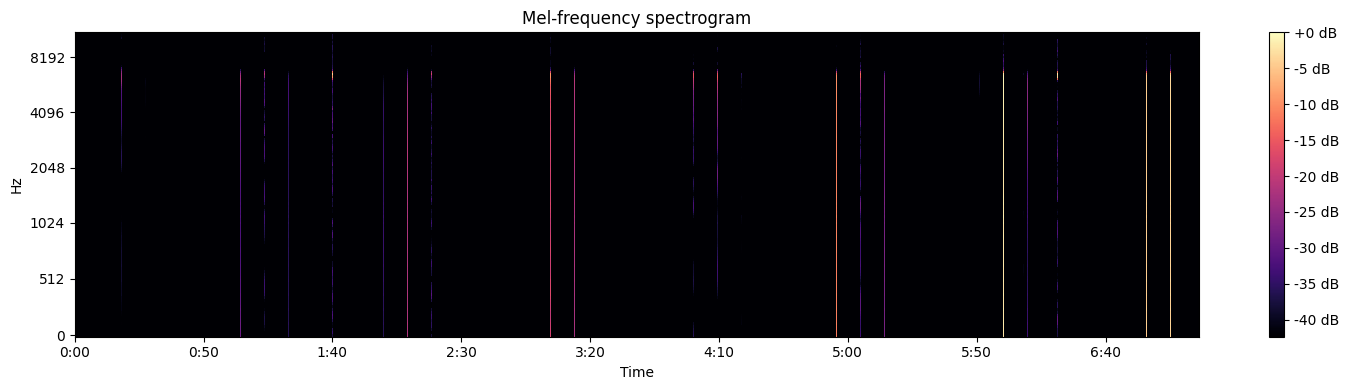

In [9]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
# Compute the Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=128)

# Convert to decibels
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Spectrogram
plt.figure(figsize=(15, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()


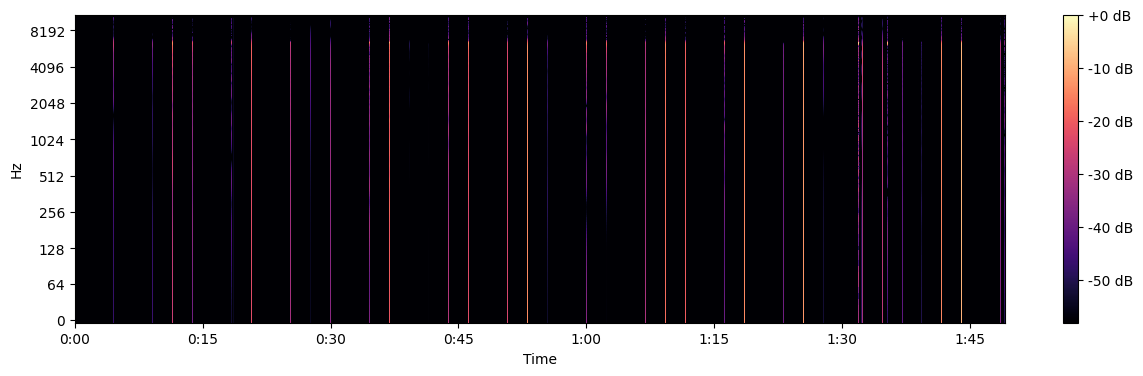

In [10]:
hop_length = 512
n_fft = 2048
D = np.abs(librosa.stft(y, n_fft=n_fft,  hop_length=hop_length))
DB = librosa.amplitude_to_db(D, ref=np.max)
plt.figure(figsize=(15, 4))
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

In [16]:
# get 66,260,701 byte
19,238,256
hex_number = hex(66260701)
print(hex_number)

0x3f30edd


In [13]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
rate, data = wavfile.read('themusicmono.wav')

# Define the frequency range of the blue part
blue_freq_range = (15500, 22500)  # Replace with actual values

# Compute Fourier Transform
frequencies = np.fft.fftfreq(len(data), 1/rate)
fft_values = np.fft.fft(data)

# Filter out low frequencies
blue_part_fft = fft_values.copy()
blue_part_fft[(frequencies < blue_freq_range[0]) | (frequencies > blue_freq_range[1])] = 0

# Inverse Fourier Transform to get time-domain signal of the blue part
blue_part_signal = np.fft.ifft(blue_part_fft).real

# Analyze the blue part signal to decode the message
# This step will depend on the nature of the message and how it was encoded

# Save the blue part signal as a new audio file
wavfile.write('blue_part_message.wav', rate, blue_part_signal.astype(np.int16))

# Plot original and filtered FFT values for comparison
# plt.figure(figsize=(15,5))
# plt.plot(frequencies, np.abs(fft_values), label='Original FFT')
# plt.plot(frequencies, np.abs(high_freq_fft), label='High Frequency FFT')
# plt.legend()
# plt.show()

# Inverse Fourier Transform to get time-domain signal of high frequencies 
# high_freq_signal = np.fft.ifft(high_freq_fft).real


In [2]:
audible_signal = np.fft.ifft(np.fft.fftshift(high_freq_fft)).real

# Save the audible signal as a new audio file
wavfile.write('audible_message.wav', rate, audible_signal.astype(np.int16))

In [ ]:
# Assuming 'data' is the loaded audio data and 'rate' is the sampling rate



# Compute Fourier Transform
fft_values = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data), 1/rate)

# Isolate the blue part frequencies
blue_part_fft = fft_values.copy()
blue_part_fft[(frequencies < blue_freq_range[0]) | (frequencies > blue_freq_range[1])] = 0

# Inverse Fourier Transform to get time-domain signal of the blue part
blue_part_signal = np.fft.ifft(blue_part_fft).real

# Analyze the blue part signal to decode the message
# This step will depend on the nature of the message and how it was encoded

# Save the blue part signal as a new audio file
wavfile.write('blue_part_message.wav', rate, blue_part_signal.astype(np.int16))


In [ ]:
37.773684, -122.463352

-122.463352, 37.773684

In [ ]:
# solution

https://docs.google.com/forms/d/e/1FAIpQLSemf-w2PPc5rHumN8wuuM_b9wzvYJ8zEVqixcVqJuUEzUy0dg/viewform?fbzx=-2583281431727182095

35.884006, -106.302051